In [3]:
!pip install mediapipe > /dev/null 2>&1 || true

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# Base directory
base_dir = '/kaggle/input/indian-sign-language-islrtc-referred/original_images'

In [6]:
# Get all class label folders (0–9, a–z)
labels = sorted(os.listdir(base_dir))
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


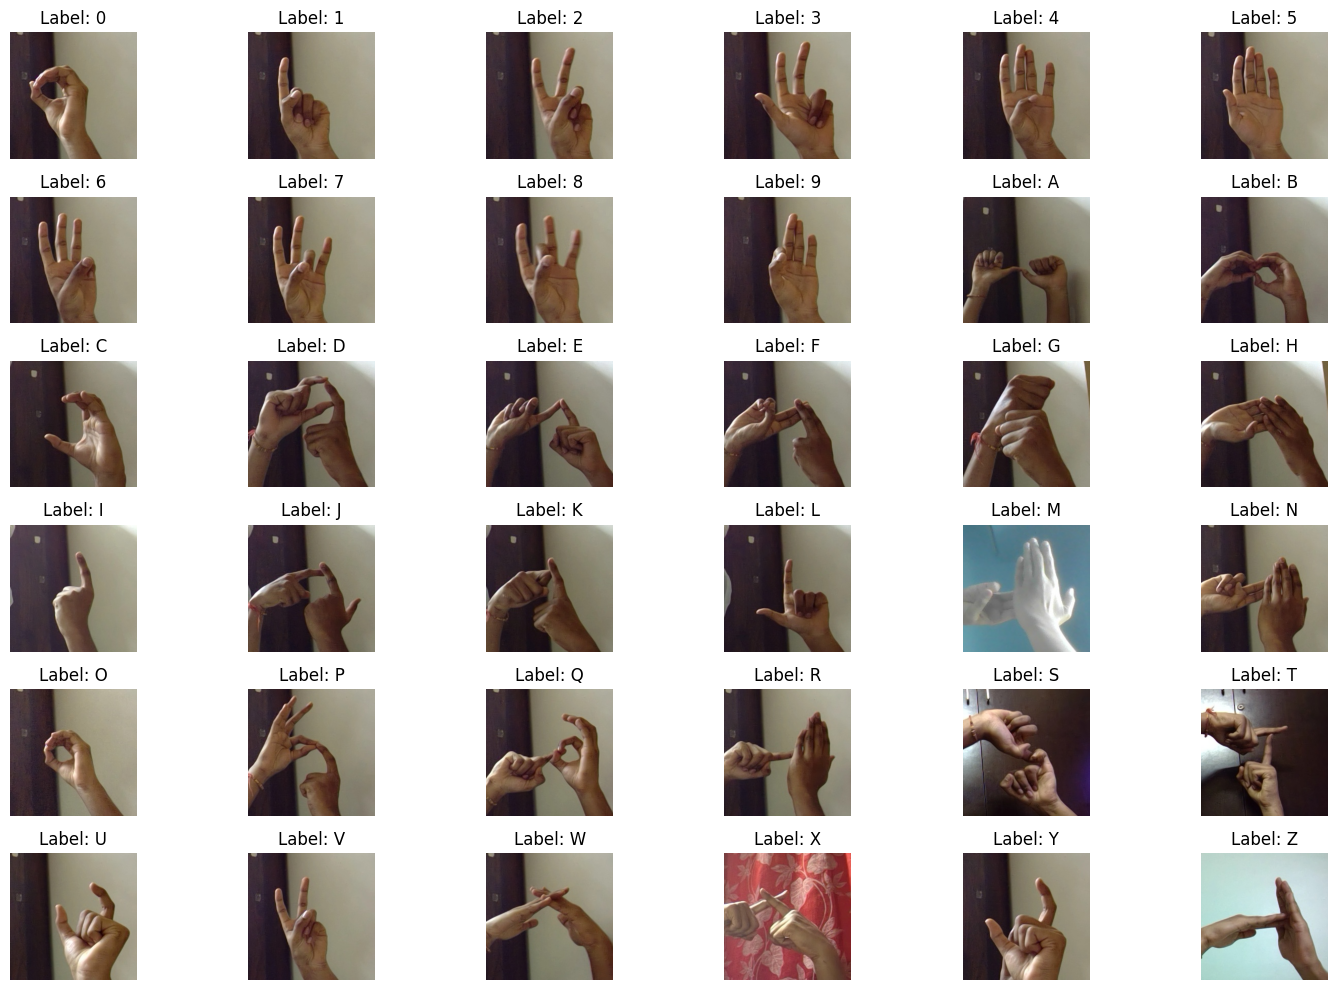

In [7]:
# Show 1 image per label
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    label_path = os.path.join(base_dir, label)
    img_files = os.listdir(label_path)
    
    if img_files:
        img_path = os.path.join(label_path, img_files[100])
        img = Image.open(img_path)

        plt.subplot(6, 6, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2025-06-01 10:09:55.257391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748772595.516344      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748772595.594700      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
# Load image of label 'A'
a_path = '/kaggle/input/indian-sign-language-islrtc-referred/original_images/A'
image_file = os.listdir(a_path)[0]
image_path = os.path.join(a_path, image_file)

In [28]:
# Read and convert image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
results = hands.process(image_rgb)

W0000 00:00:1748773248.810417     131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748773248.854564     131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Detected 2 hand(s)
Hand 1 has 21 landmarks
Hand 2 has 21 landmarks


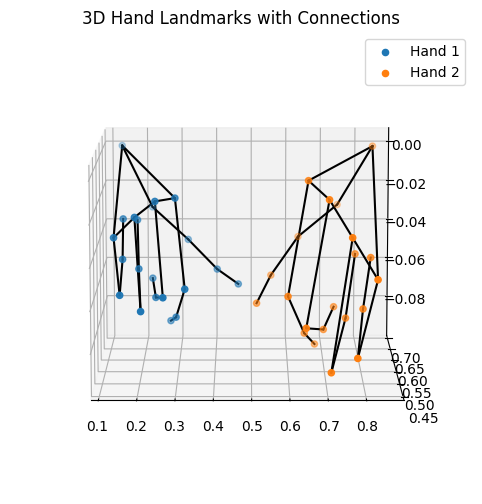

In [29]:
# Check and display hands
if results.multi_hand_landmarks:
    print(f"Detected {len(results.multi_hand_landmarks)} hand(s)")

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f"Hand {hand_idx + 1} has {len(hand_landmarks.landmark)} landmarks")

        # Extract coordinates
        x = [lm.x for lm in hand_landmarks.landmark]
        y = [lm.y for lm in hand_landmarks.landmark]
        z = [lm.z for lm in hand_landmarks.landmark]

        # Plot landmarks
        ax.scatter(x, y, z, label=f'Hand {hand_idx + 1}')

        # Draw connections
        for connection in mp_hands.HAND_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]
            ax.plot(
                [x[start_idx], x[end_idx]],
                [y[start_idx], y[end_idx]],
                [z[start_idx], z[end_idx]],
                c='black'
            )

    ax.set_title("3D Hand Landmarks with Connections")
    ax.view_init(elev=10, azim=-90)
    ax.legend()
    plt.show()
else:
    print("No hands detected.")

W0000 00:00:1748755539.570947     156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748755539.586779     156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Label 0: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 1: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 2: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 3: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 4: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 5: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 6: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 7: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 8: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label 9: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label A: Detected 2 hand(s)
  ➤ Hand 1: 21 landmarks
  ➤ Hand 2: 21 landmarks

Label B: Detected 2 hand(s)
  ➤ Hand 1: 21 landmarks
  ➤ Hand 2: 21 landmarks

Label C: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label D: Detected 1 hand(s)
  ➤ Hand 1: 21 landmarks

Label E: Detected 2 hand(s)
  ➤ Hand 1: 21 landmarks
  ➤ Hand 2: 21 landmarks

Label F: Detected 2 hand(s)
  ➤ Hand 1: 21 landmarks
  ➤ Hand 2: 21 landmarks

Label G: Detected 1 hand(s)
  ➤ Han

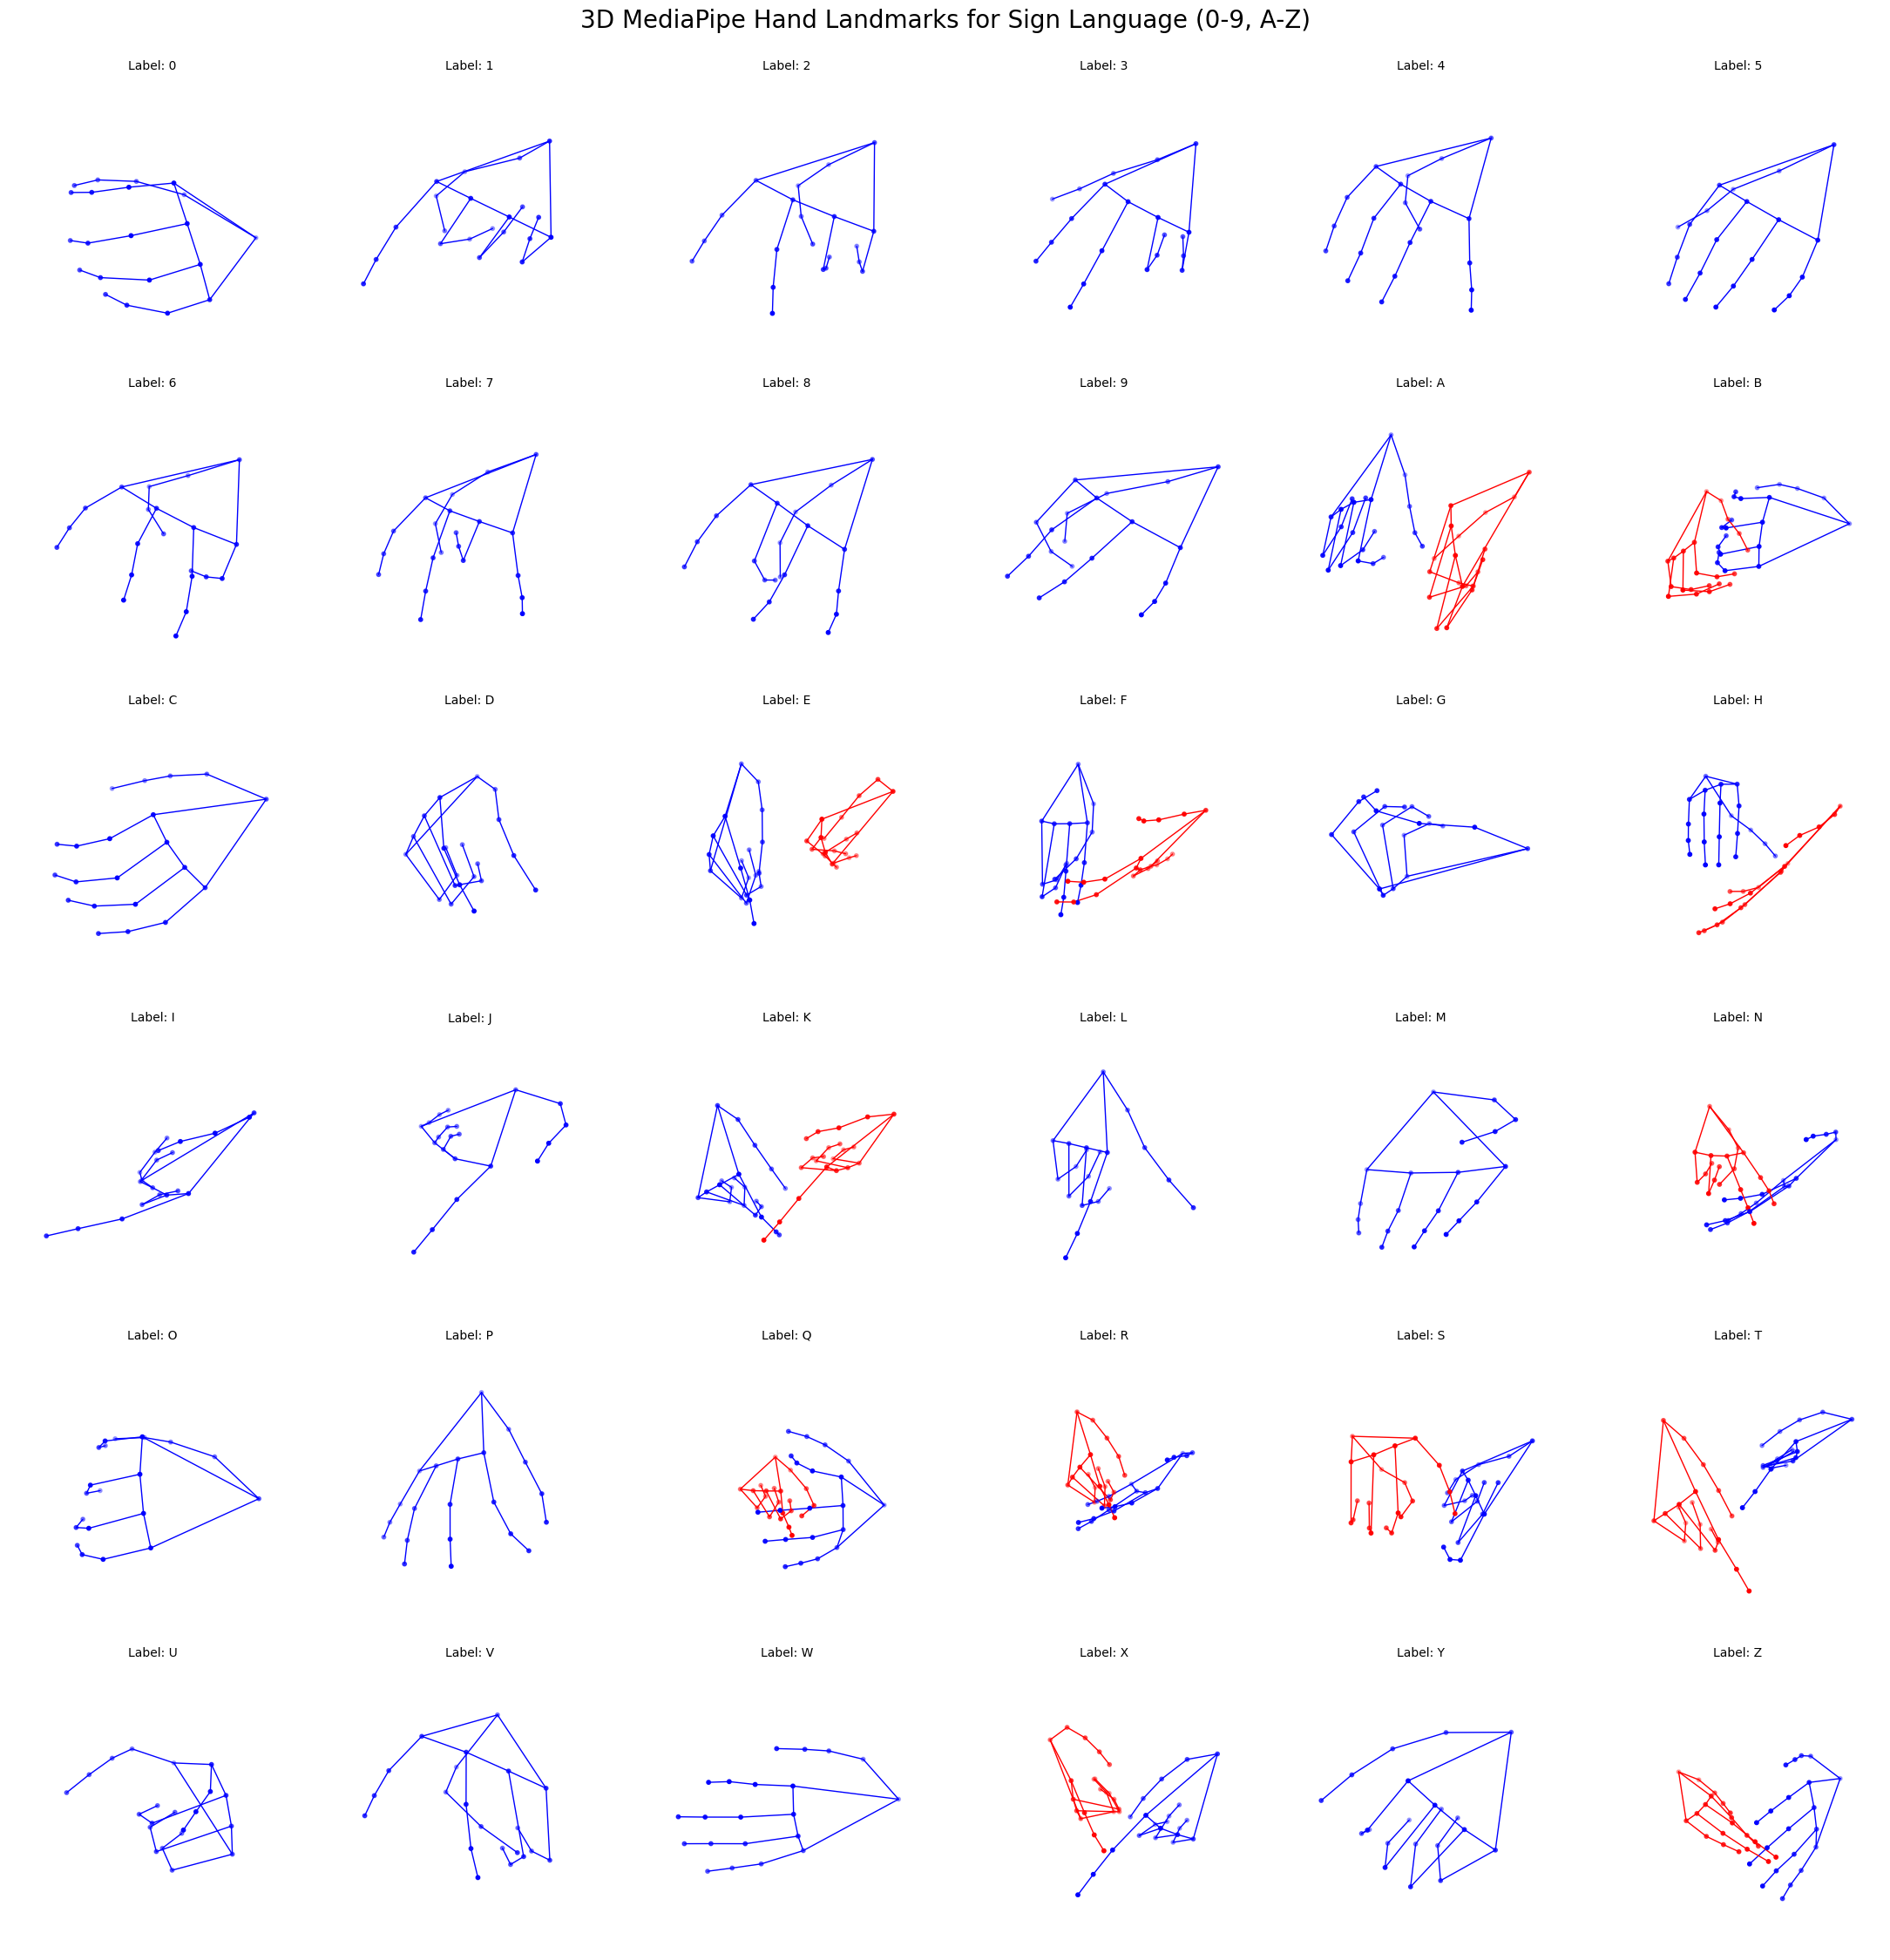

In [23]:
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up
base_path = '/kaggle/input/indian-sign-language-islrtc-referred/original_images'
labels = sorted(os.listdir(base_path))  # '0'-'9' + 'A'-'Z'
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
colors = ['blue', 'red']  # Left and right hands

# Plotting config
fig = plt.figure(figsize=(22, 22))
count = 1

for label in labels:
    label_path = os.path.join(base_path, label)
    image_files = os.listdir(label_path)
    
    if not image_files:
        continue
    
    image_path = os.path.join(label_path, image_files[0])
    if(label=='J' or label=='M' or label=='X'):
        image_path = os.path.join(label_path, image_files[200])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = hands.process(image_rgb)

    # Subplot
    ax = fig.add_subplot(6, 6, count, projection='3d')
    ax.set_title(f'Label: {label}', fontsize=10)

    if results.multi_hand_landmarks:
        print(f"\nLabel {label}: Detected {len(results.multi_hand_landmarks)} hand(s)")
        for i, hand_landmarks in enumerate(results.multi_hand_landmarks):
            print(f"  ➤ Hand {i + 1}: {len(hand_landmarks.landmark)} landmarks")
            x = [lm.x for lm in hand_landmarks.landmark]
            y = [lm.y for lm in hand_landmarks.landmark]
            z = [lm.z for lm in hand_landmarks.landmark]

            # Plot landmarks
            ax.scatter(x, y, z, c=colors[i % 2], s=10)

            # Draw connections
            for connection in mp_hands.HAND_CONNECTIONS:
                start_idx, end_idx = connection
                ax.plot(
                    [x[start_idx], x[end_idx]],
                    [y[start_idx], y[end_idx]],
                    [z[start_idx], z[end_idx]],
                    c=colors[i % 2], linewidth=1
                )
    else:
        print(f"\nLabel {label}: No hands detected")

    ax.set_axis_off()
    count += 1
    if count > 36:
        break

plt.tight_layout()
plt.suptitle("3D MediaPipe Hand Landmarks for Sign Language (0-9, A-Z)", fontsize=20, y=1.02)
plt.show()


In [22]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tqdm import tqdm
import pickle

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Dataset path
base_path = '/kaggle/input/indian-sign-language-islrtc-referred/original_images'
labels = sorted(os.listdir(base_path))

W0000 00:00:1748680926.618256     142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748680926.652065     142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [23]:
X = []
y = []

# Loop through each label folder
for label in tqdm(labels, desc="Processing labels"):
    folder_path = os.path.join(base_path, label)
    image_files = os.listdir(folder_path)

    for file in image_files:
        image_path = os.path.join(folder_path, file)
        image = cv2.imread(image_path)
        if image is None:
            continue
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)

        if results.multi_hand_landmarks:
            hands_data = []
            for hand_landmarks in results.multi_hand_landmarks:
                coords = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]
                hands_data.append(np.array(coords).flatten())

            # If only one hand, pad with zeros to get 126-length vector
            if len(hands_data) == 1:
                hands_data.append(np.zeros(63))

            # Always sort: left first (based on wrist x)
            hands_data.sort(key=lambda hand: hand[0])  # wrist x is at index 0

            # Concatenate both hands into one feature vector
            X.append(np.concatenate(hands_data))
            y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)



Processing labels: 100%|██████████| 36/36 [24:55<00:00, 41.53s/it]


In [24]:
# Save dataset
np.save("X_landmarks.npy", X)
np.save("y_labels.npy", y)
with open("class_labels.pkl", "wb") as f:
    pickle.dump(labels, f)

print("Saved landmark dataset.")
print("X shape:", X.shape)
print("y shape:", y.shape)


Saved landmark dataset.
X shape: (22882, 126)
y shape: (22882,)


In [25]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load data
X = np.load("X_landmarks.npy")
y = np.load("y_labels.npy")

# Encode labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [26]:
# Save label encoder for future decoding
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.4, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (13729, 126) (13729, 36)
Test shape: (9153, 126) (9153, 36)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(126,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1507 - loss: 2.9646 - val_accuracy: 0.6007 - val_loss: 1.2894
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5591 - loss: 1.3005 - val_accuracy: 0.7393 - val_loss: 0.7903
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6812 - loss: 0.9360 - val_accuracy: 0.8119 - val_loss: 0.5749
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7572 - loss: 0.7353 - val_accuracy: 0.8500 - val_loss: 0.4566
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7951 - loss: 0.6004 - val_accuracy: 0.8624 - val_loss: 0.4104
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8108 - loss: 0.5385 - val_accuracy: 0.8791 - val_loss: 0.3586
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8306 - loss: 0.4803 - val_accuracy: 0.8965 - val_loss: 0.3370
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8220 - loss: 0.5171 - val_accuracy: 0.

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes for test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"Test Accuracy: {accuracy:.4f}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.9677


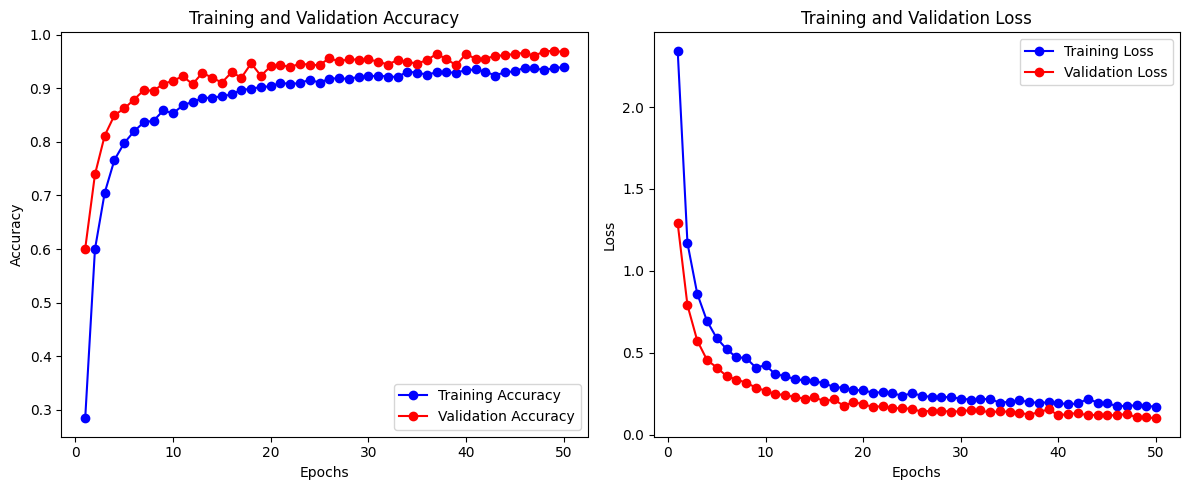

In [37]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

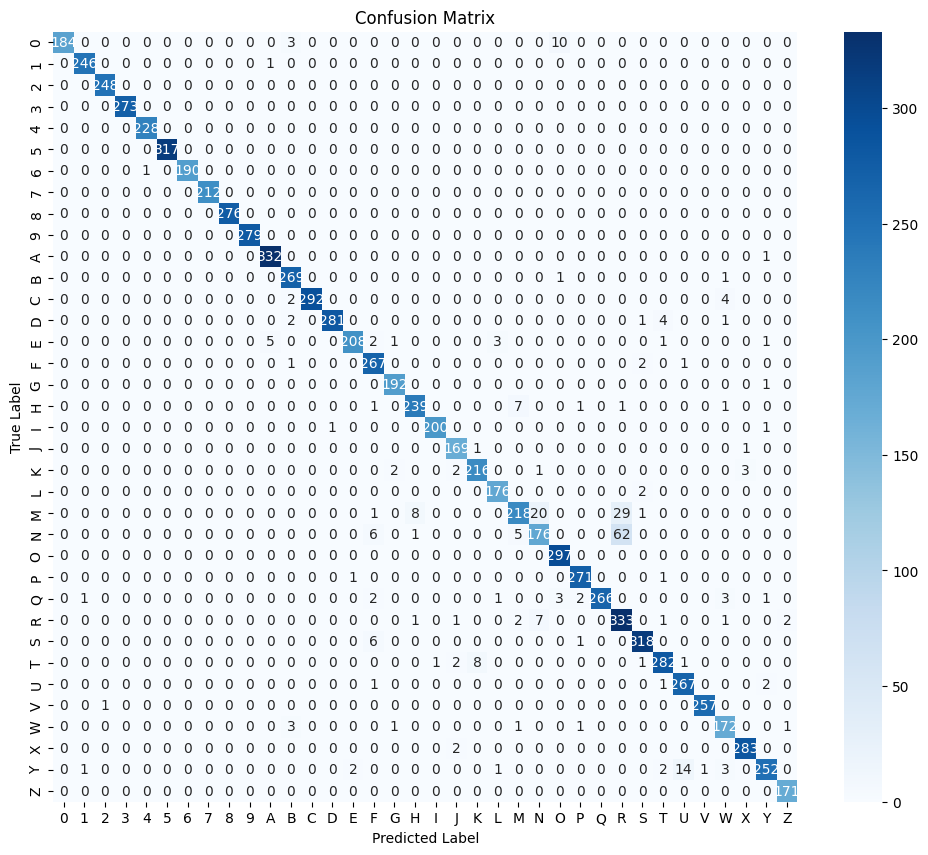

In [38]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = le.classes_

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [39]:
# Detailed classification report
print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

           0       1.00      0.93      0.97       197
           1       0.99      1.00      0.99       247
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       273
           4       1.00      1.00      1.00       228
           5       1.00      1.00      1.00       317
           6       1.00      0.99      1.00       191
           7       1.00      1.00      1.00       212
           8       1.00      1.00      1.00       276
           9       1.00      1.00      1.00       279
           A       0.98      1.00      0.99       333
           B       0.96      0.99      0.98       271
           C       1.00      0.98      0.99       298
           D       1.00      0.97      0.98       289
           E       0.99      0.94      0.96       221
           F       0.93      0.99      0.96       271
           G       0.98      0.99      0.99       193
           H       0.96    

In [42]:
model.save("sign_language_models.h5")
print("Model saved as sign_language_models.h5")

Model saved as sign_language_models.h5
